# 

# Importing libraries

In [119]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [120]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
import optuna
import sklearn
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score,auc
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
from sklearn.feature_selection import chi2
import klib

In [122]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# Importing dataset

In [123]:
dataset=pd.read_csv('Bank_dataset.csv')
dataset.head(10)
df=dataset.copy(deep=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5000 non-null   int64  
 1   ID             5000 non-null   int64  
 2   Pin-code       5000 non-null   int64  
 3   age            5000 non-null   int64  
 4   Fam members    5000 non-null   float64
 5   Education      5000 non-null   object 
 6   T.Experience   5000 non-null   float64
 7   Income         5000 non-null   int64  
 8   Mortgage       5000 non-null   int64  
 9   Fixed Deposit  5000 non-null   object 
 10  Demat          5000 non-null   object 
 11  Net Banking    5000 non-null   object 
 12  Loan           5000 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 507.9+ KB


In [124]:
dataset.shape
# dataset have 5000 Rows and 13 columns

(5000, 13)

In [125]:
#Column names are
df.columns

Index(['Unnamed: 0', 'ID', 'Pin-code', 'age', 'Fam members', 'Education',
       'T.Experience', 'Income', 'Mortgage', 'Fixed Deposit', 'Demat',
       'Net Banking', 'Loan'],
      dtype='object')

In [126]:
#Number of unique values in each column in the dataset
df.nunique()

Unnamed: 0       5000
ID               5000
Pin-code            5
age                45
Fam members         4
Education           3
T.Experience       47
Income            162
Mortgage          347
Fixed Deposit       2
Demat               2
Net Banking         2
Loan                2
dtype: int64

In [127]:
#Checking first 10 rows of the dataset
df.head(10)

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
5,5,10006,110004,35,4.0,Graduate,13.0,232000,1240000,no,no,yes,no
6,6,10007,110001,51,2.0,Graduate,27.0,576000,0,no,no,yes,no
7,7,10008,110004,48,1.0,Post Graduate,24.0,176000,0,no,no,no,no
8,8,10009,110011,33,3.0,Graduate,10.0,648000,832000,no,no,yes,no
9,9,100010,110001,32,1.0,Post Graduate,9.0,1440000,0,no,no,no,yes


GridSpec(6, 5)

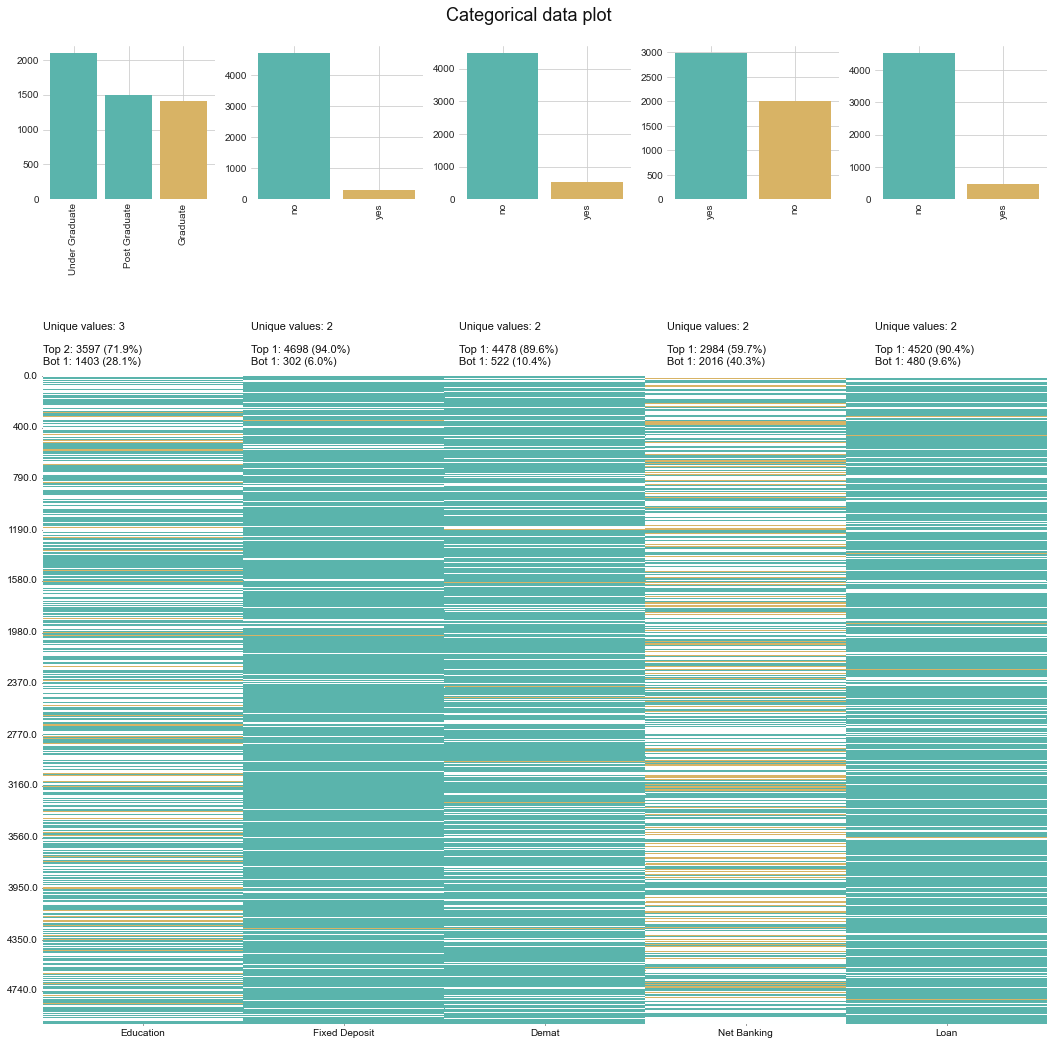

In [128]:
# returns a visualization of the number and frequency of categorical features ;we use plots for visualizing the relationship between variables. 
#Those variables can be either be completely numerical or a category like a group, class or division. 
klib.cat_plot(df)

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

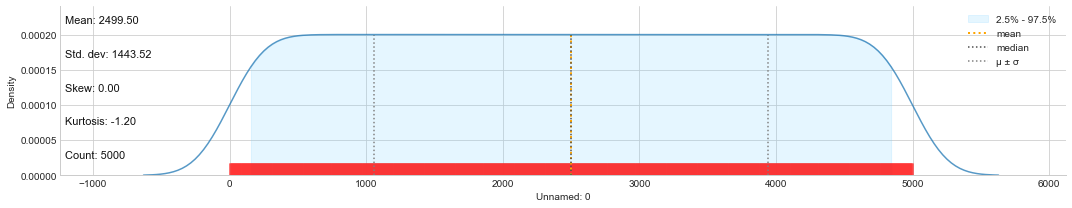

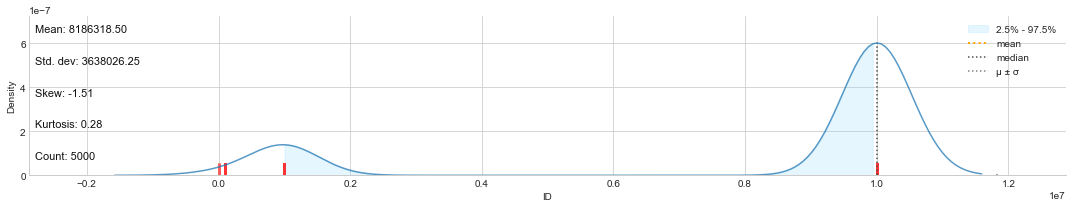

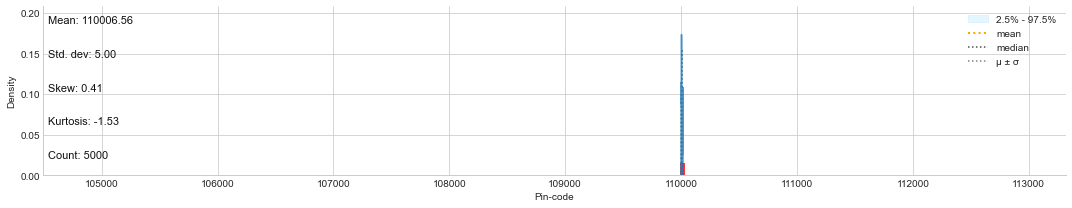

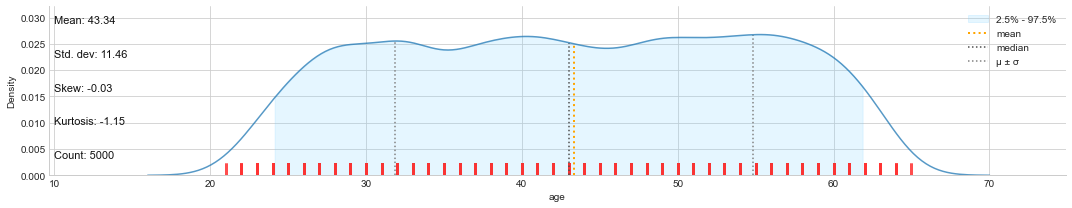

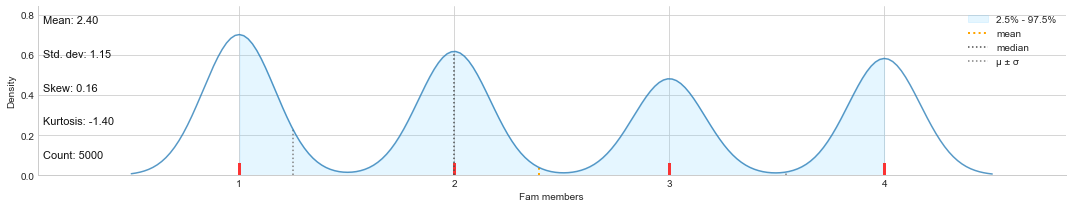

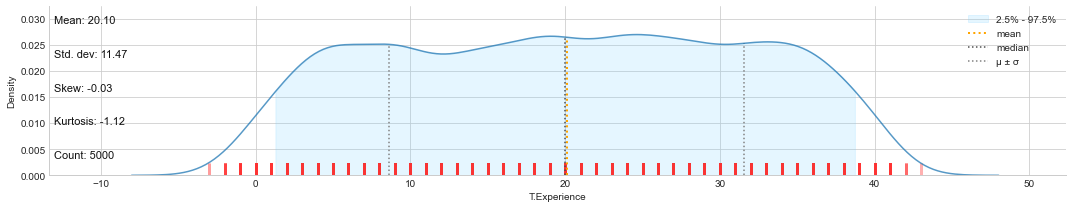

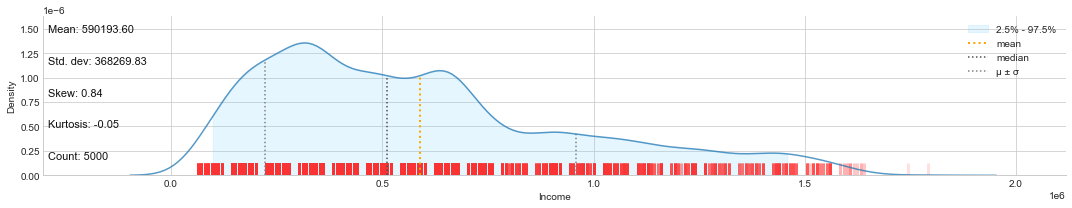

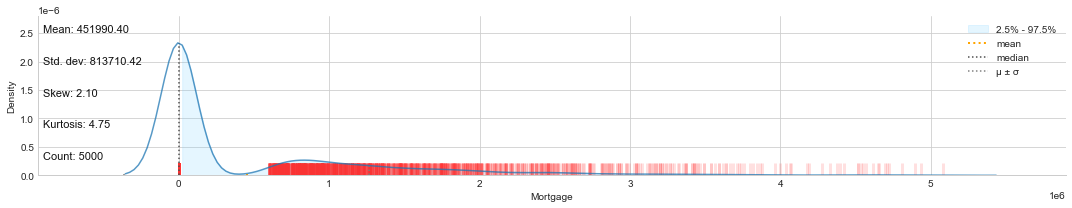

In [129]:
#returns a distribution plot for every numeric feature visually assess the distribution of sample data by 
#comparing the empirical distribution of the data with the theoretical values expected from a specified distribution. 
#We are using distribution plots in addition to more formal hypothesis tests to determine whether the sample data comes from a specified distribution.'''
klib.dist_plot(df)

In [130]:
# returns a figure containing information about missing values
klib.missingval_plot(df)

No missing values found in the dataset.


In [131]:
#performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(df)

Shape of cleaned data: (5000, 13) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.35 MB (-70.0%)



,unnamed_0,id,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [132]:
# cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(df)

,unnamed_0,id,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [133]:
# converts existing to more efficient dtypes, also called inside data_cleaning()
klib.convert_datatypes(df)

,unnamed_0,id,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [134]:
# drops missing values, also called in data_cleaning()
klib.drop_missing(df)

,unnamed_0,id,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [135]:
df.head(5)

,unnamed_0,id,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no


In [136]:
df.dtypes

unnamed_0          int64
id                 int64
pin_code           int64
age                int64
fam_members      float64
education         object
t_experience     float64
income             int64
mortgage           int64
fixed_deposit     object
demat             object
net_banking       object
loan              object
dtype: object

In [137]:
# drops features with high ratio of missing vals based on informational content
klib.mv_col_handling(df)

,unnamed_0,id,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,10004996,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,4996,10004997,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,4997,10004998,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,4998,10004999,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [138]:
#Removing unamed and ID as they are different and are of no help to the model
df.drop(['unnamed_0','id'],axis=1,inplace=True)
df.dtypes

pin_code           int64
age                int64
fam_members      float64
education         object
t_experience     float64
income             int64
mortgage           int64
fixed_deposit     object
demat             object
net_banking       object
loan              object
dtype: object

In [139]:
df.shape

(5000, 11)

In [140]:
df.tail(5)

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
4995,110014,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,110004,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,110014,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,110003,63,3.0,Graduate,40.0,392000,0,no,no,yes,no
4999,110001,26,3.0,Under Graduate,4.0,664000,0,no,no,yes,no


In [141]:
#Checking for dublicate values
df.duplicated().sum()
#We get 9 dublicate values.

9

In [142]:
#Deleting dublipcate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [143]:
#Now, we are left with 4991 Rows and 11 Columns
df.shape

(4991, 11)

In [144]:
#Getting the Count of Unique values
df.nunique()

pin_code           5
age               45
fam_members        4
education          3
t_experience      47
income           162
mortgage         347
fixed_deposit      2
demat              2
net_banking        2
loan               2
dtype: int64

In [145]:
#Separating numerical and categorical data
df_numerical=list(df.select_dtypes(exclude='object').columns)
df_categorial=list(df.select_dtypes(include='object').columns)
print(df_numerical)
print(df_categorial)

['pin_code', 'age', 'fam_members', 't_experience', 'income', 'mortgage']
['education', 'fixed_deposit', 'demat', 'net_banking', 'loan']


In [146]:
#Using describe() to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 
df.describe()

,pin_code,age,fam_members,t_experience,income,mortgage
count,4991.000000,4991.000000,4991.000000,4991.000000,4.991000e+03,4.991000e+03
mean,110006.558405,43.339010,2.396313,20.105590,5.903522e+05,4.528054e+05
std,4.998571,11.466938,1.147804,11.471297,3.684175e+05,8.142172e+05
min,110001.000000,21.000000,1.000000,-3.000000,6.400000e+04,0.000000e+00
25%,110003.000000,33.000000,1.000000,10.000000,3.120000e+05,0.000000e+00
50%,110004.000000,43.000000,2.000000,20.000000,5.120000e+05,0.000000e+00
75%,110011.000000,53.000000,3.000000,30.000000,7.840000e+05,8.080000e+05
max,110014.000000,65.000000,4.000000,43.000000,1.792000e+06,5.080000e+06


<AxesSubplot:>

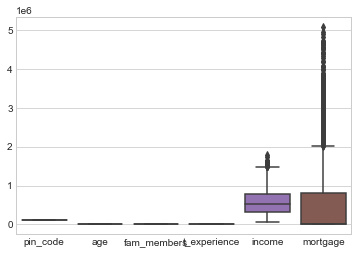

In [147]:
#Box plot helps to maintain the distribution of quantitative data in such a way that it facilitates the comparisons between variables or across levels of a categorical variable.
#In the graph given below the main body of the box plot showing the quartiles and the median’s confidence intervals. 
#The medians have horizontal lines at the median of each box and while whiskers have the vertical lines extending to the most extreme,
#outlier and non-outlier data points and caps are the horizontal lines at the ends of the whiskers.
sns.boxplot(data=df)

<AxesSubplot:xlabel='pin_code', ylabel='count'>

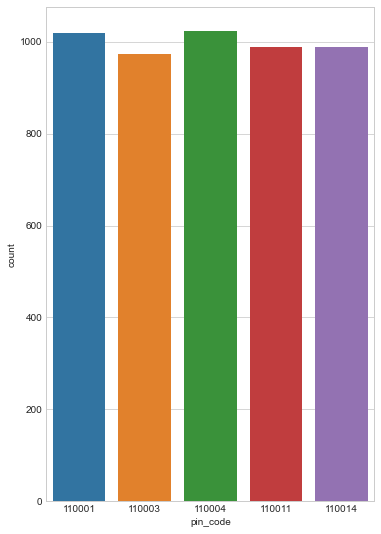

In [148]:
#The given boxplot shows the count of costomers with respect the the perticular are pin-code
plt.figure(figsize=(20,20))
plt.subplot(2,3,2)
sns.countplot(x = 'pin_code', data = df)

In [149]:
#To display the column-counts
for col in df:
    print(df[col].value_counts())
    print("#" * 40)

110004    1024
110001    1018
110014     988
110011     988
110003     973
Name: pin_code, dtype: int64
########################################
33    150
41    149
50    145
52    143
56    143
48    138
28    136
39    136
54    135
32    134
37    133
57    132
55    131
49    128
44    127
43    127
58    127
40    126
38    125
29    125
53    124
60    123
59    122
27    122
30    120
31    120
42    120
46    118
36    115
47    113
45    113
51    112
61    108
34    106
35    106
26    103
25     91
63     80
62     78
24     78
23     53
22     28
64     24
65     12
21     12
Name: age, dtype: int64
########################################
1.0    1470
2.0    1293
4.0    1220
3.0    1008
Name: fam_members, dtype: int64
########################################
Under Graduate    2090
Post Graduate     1500
Graduate          1401
Name: education, dtype: int64
########################################
 32.0    153
 20.0    148
 9.0     147
 5.0     146
 35.0    143
 23.0    143
 

In [150]:
#Displays the first five rows of the dataframe
df.head()

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no


In [151]:
#we encounter columns that contain categorical features (string values) for example parameter fixed_deposit will have categorical parameters like yes, no. 
#These labels have no specific order of preference and also since the data is string labels, 
#machine learning models misinterpreted that there is some sort of hierarchy in them.
#Hence, an approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example yes and no mapped to 1 and 0. 
#But this can add bias in our model as it will start giving higher preference to the no parameter as 1>0 and ideally both labels are equally important in the dataset. 
#To deal with this issue we will use One Hot Encoding technique.


dict={"yes":1,"no":0}
df["fixed_deposit"]=df['fixed_deposit'].map(dict)
df["demat"]=df['demat'].map(dict)
df["net_banking"]=df['net_banking'].map(dict)
df["loan"]=df['loan'].map(dict)

df.head()

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,110001,23,4.0,Under Graduate,1.0,392000,0,0,1,0,0
1,110014,43,3.0,Under Graduate,19.0,272000,0,0,1,0,0
2,110014,37,1.0,Under Graduate,15.0,88000,0,0,0,0,0
3,110003,33,1.0,Graduate,9.0,800000,0,0,0,0,0
4,110004,33,4.0,Graduate,8.0,360000,0,0,0,0,0


In [152]:
#we are using a method of standardization that’s most useful when working with a dataset that contains continuous features that are on different scales, 
#and we are using a model that operates in some sort of linear space (like linear regression or K-nearest neighbors) 
#This will make it easier to linearly compare features.

df['income']=df['income'].div(1000)
df['mortgage']=df['mortgage'].div(1000)

In [153]:
df.head()

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,110001,23,4.0,Under Graduate,1.0,392.0,0.0,0,1,0,0
1,110014,43,3.0,Under Graduate,19.0,272.0,0.0,0,1,0,0
2,110014,37,1.0,Under Graduate,15.0,88.0,0.0,0,0,0,0
3,110003,33,1.0,Graduate,9.0,800.0,0.0,0,0,0,0
4,110004,33,4.0,Graduate,8.0,360.0,0.0,0,0,0,0


In [154]:
dict1={"Under Graduate":1,"Graduate":2,"Post Graduate":3}
df["education"]=df['education'].map(dict1)

In [155]:
df.head()

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,110001,23,4.0,1,1.0,392.0,0.0,0,1,0,0
1,110014,43,3.0,1,19.0,272.0,0.0,0,1,0,0
2,110014,37,1.0,1,15.0,88.0,0.0,0,0,0,0
3,110003,33,1.0,2,9.0,800.0,0.0,0,0,0,0
4,110004,33,4.0,2,8.0,360.0,0.0,0,0,0,0


In [156]:
#Converting the datatypes to int for linearity in data

df = df.astype({"fam_members":"int","t_experience":"int", "income":"int", "mortgage":"int"})
df.head()

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
0,110001,23,4,1,1,392,0,0,1,0,0
1,110014,43,3,1,19,272,0,0,1,0,0
2,110014,37,1,1,15,88,0,0,0,0,0
3,110003,33,1,2,9,800,0,0,0,0,0
4,110004,33,4,2,8,360,0,0,0,0,0


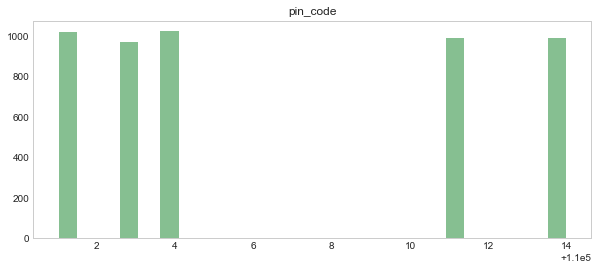

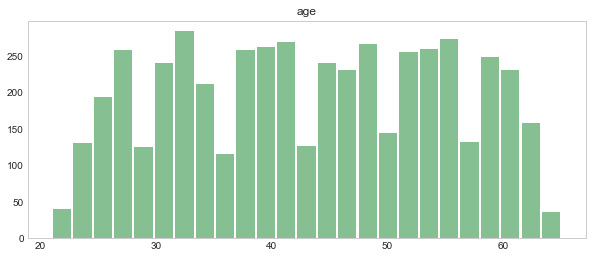

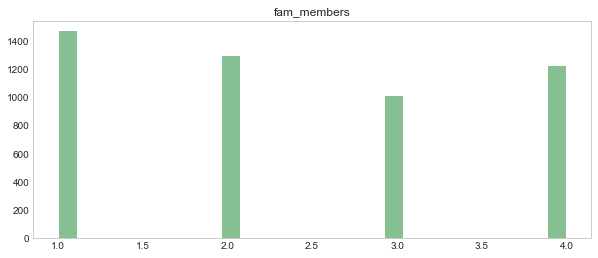

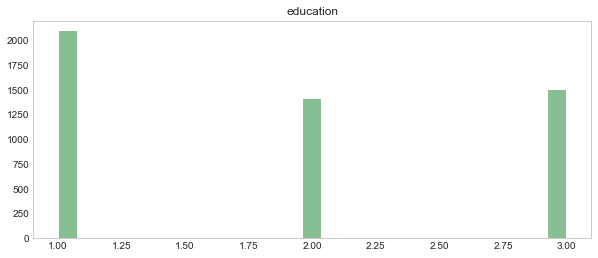

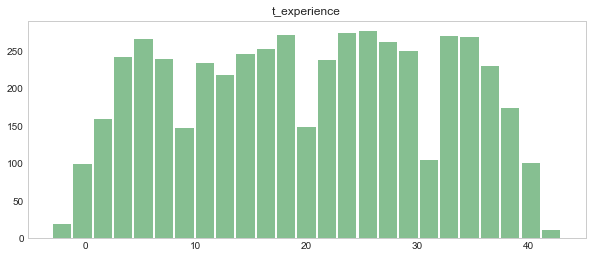

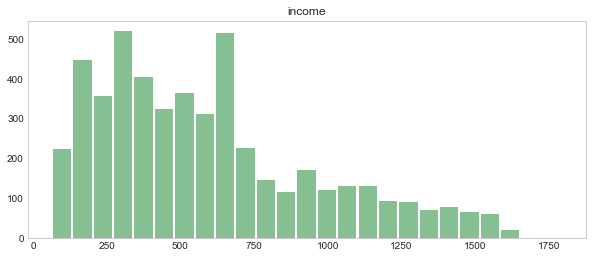

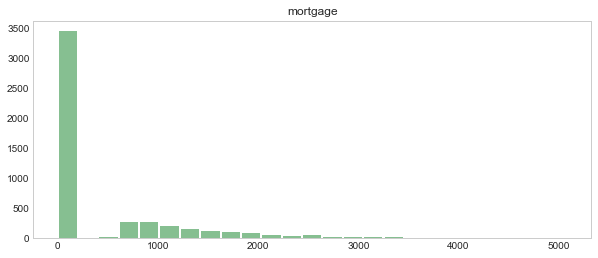

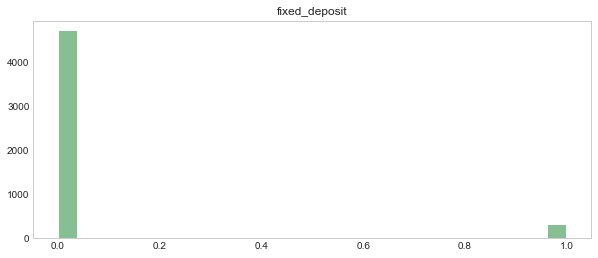

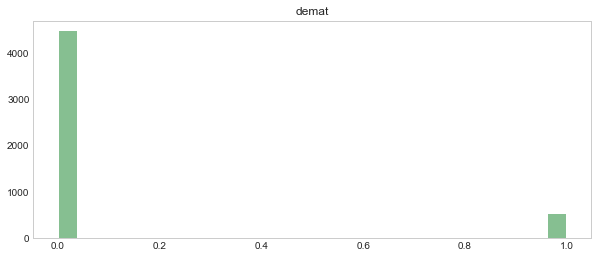

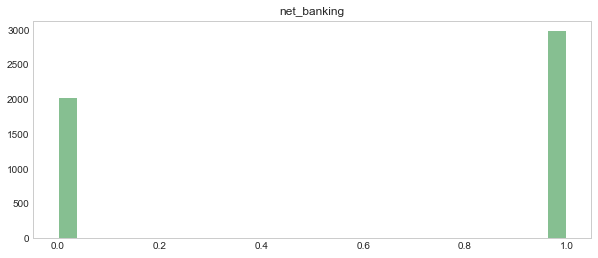

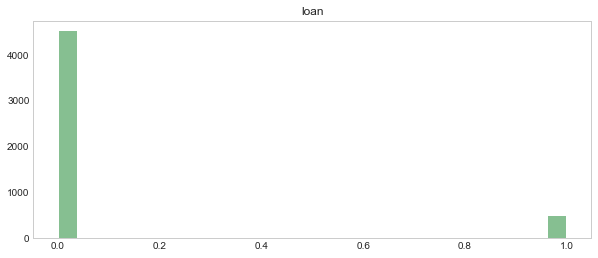

In [157]:
#We are using histogram for getting the idea of values distribution over dataset for all columns in dataframe
#Y- axis shows the count and X-axis shows the values in columns

for col in df:
    df.hist(column=col, bins=25, grid=False, figsize=(10,4), color='#86bf91', zorder=2, rwidth=0.9)

In [158]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-158-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


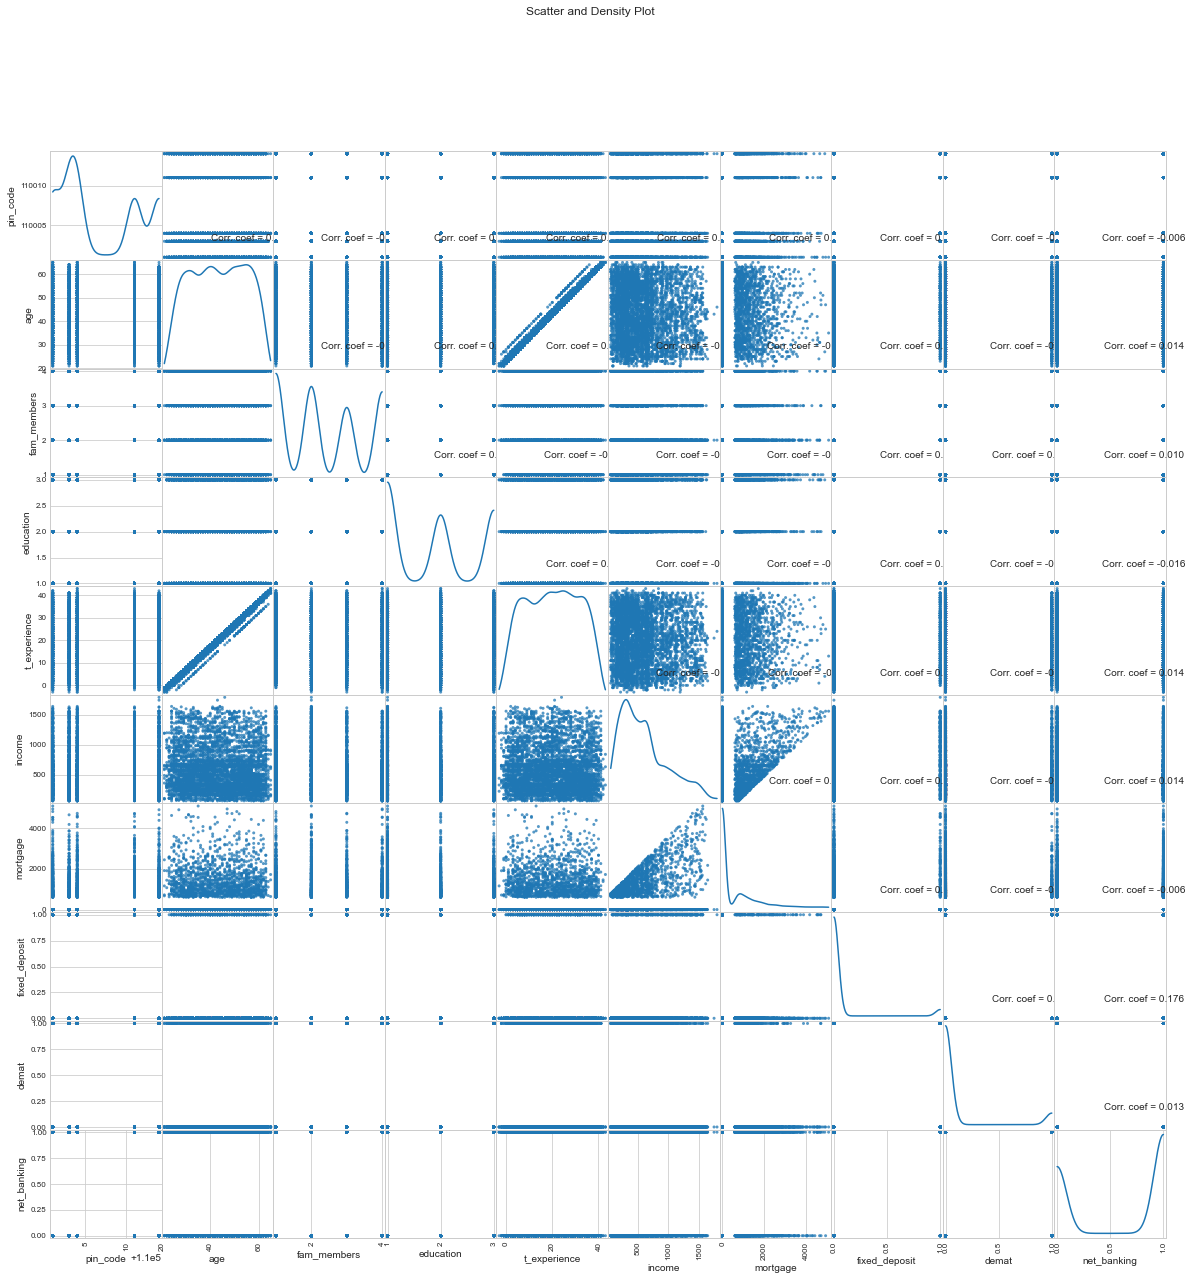

In [159]:
plotScatterMatrix(df, 20, 10)

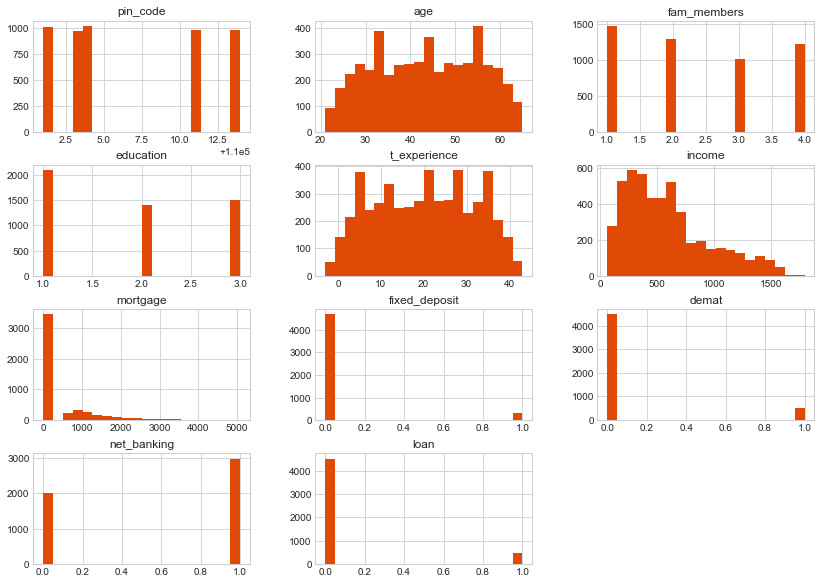

In [160]:
# Let's see how the numeric data is distributed.
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

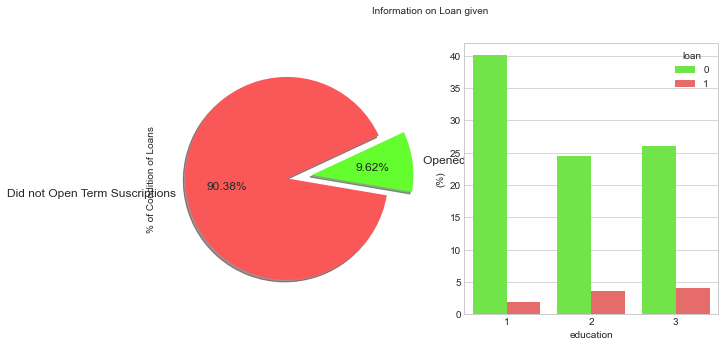

In [161]:
f, ax = plt.subplots(1,2, figsize=(10,5))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Loan given', fontsize=10)

df["loan"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=10)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="income", hue="loan", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

Observation:
1. As you can see only 9.62% are interested in taking personal loan
2. 90.38% of candidates are not interested in taking personal loan
3. dataset is imbalanced
4. Loan is highly ependent on the education level 

<AxesSubplot:>

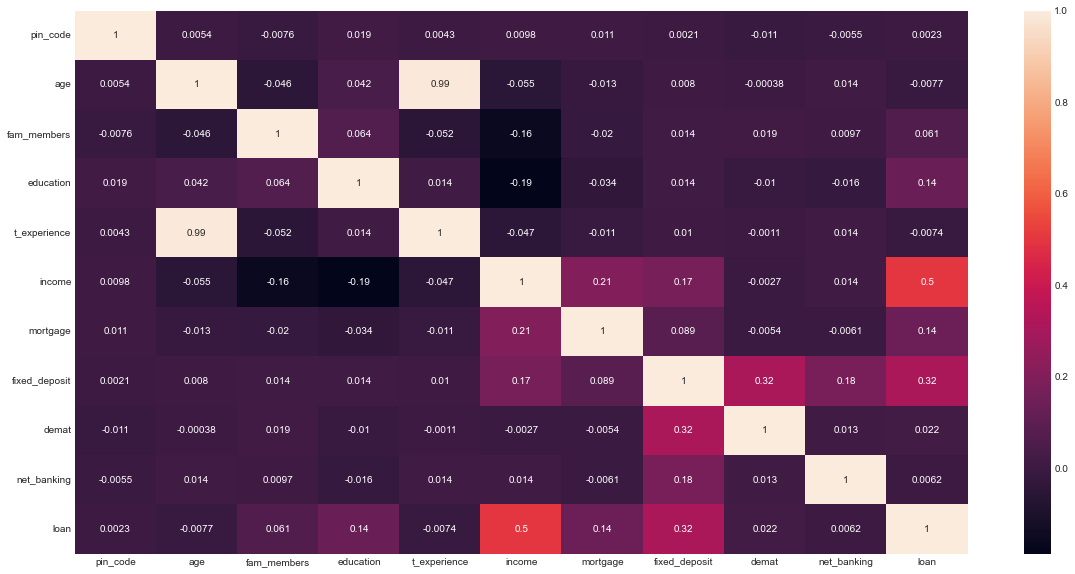

In [162]:
rcParams['figure.figsize'] = 20,10
cor=df.corr()
sns.heatmap(cor,annot=True)

Observation:
1. age and t_experience are highly correlated
2. hence, we can remove one of them
3. we observe that t_experience have some negative values
4. loan and income are moderately correlated
5. loan and fixed_deposit are moderately correlated

In [163]:
#Finding which age group have negative experience
neg=df["t_experience"].isin([-1,-2,-3])

In [164]:
df[neg]

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking,loan
89,110014,23,4,3,-1,904,0,0,0,0,0
226,110014,22,2,2,-1,312,0,0,0,0,0
315,110001,22,3,3,-2,408,0,0,0,1,0
451,110004,26,2,3,-2,384,712,0,0,1,0
524,110003,22,4,1,-1,600,0,0,0,1,0
536,110004,23,3,2,-1,344,1408,0,0,1,0
540,110001,23,4,3,-1,872,2512,0,0,1,0
576,110014,23,3,3,-1,384,0,0,0,0,0
583,110011,22,2,2,-1,304,0,0,0,1,0
597,110001,22,2,1,-2,1000,0,0,1,0,0


In [165]:
df[neg].shape

(52, 11)

In [166]:
#Finding age with negative experience
df[neg].age.unique()

array([23, 22, 26, 21, 27, 24], dtype=int64)

In [167]:
#As age group is much smaller comparing dataframe hence we can conclude that this can be human error; we are converting it into possitive values
df['t_experience']=df['t_experience'].abs()

<AxesSubplot:>

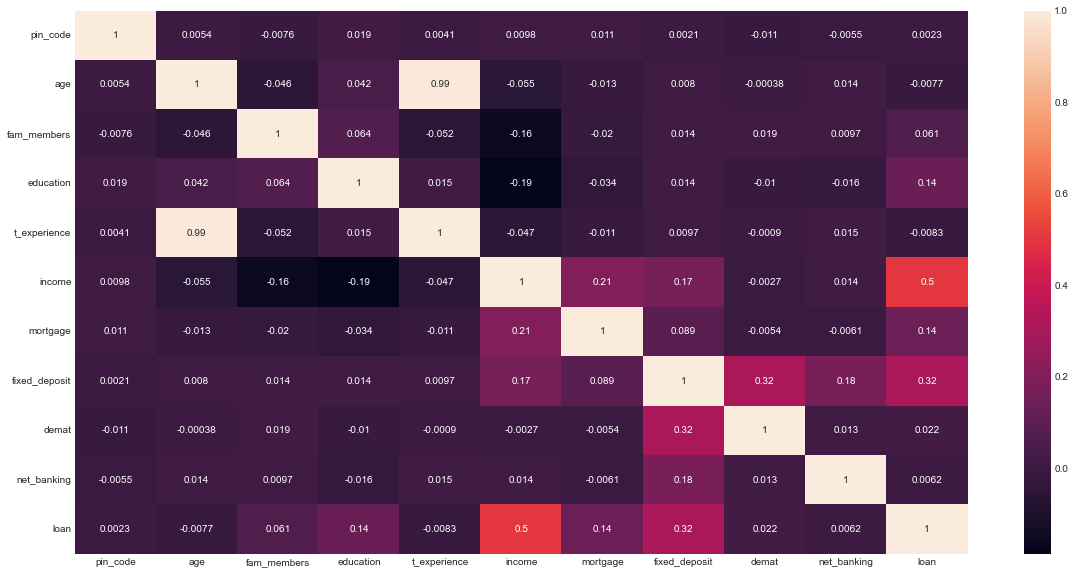

In [168]:
cor=df.corr()
sns.heatmap(cor,annot=True)

In [169]:
XX=df.drop(['age'],axis=1)
X = df.drop(['loan'], axis=1)
Y=df['loan']
X

,pin_code,age,fam_members,education,t_experience,income,mortgage,fixed_deposit,demat,net_banking
0,110001,23,4,1,1,392,0,0,1,0
1,110014,43,3,1,19,272,0,0,1,0
2,110014,37,1,1,15,88,0,0,0,0
3,110003,33,1,2,9,800,0,0,0,0
4,110004,33,4,2,8,360,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,110014,27,1,3,3,320,0,0,0,1
4996,110004,28,4,1,4,120,680,0,0,1
4997,110014,61,2,3,39,192,0,0,0,0
4998,110003,63,3,2,40,392,0,0,0,1


In [170]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

Performing Mutual information gain for finding columns which affect taking ersonal loan

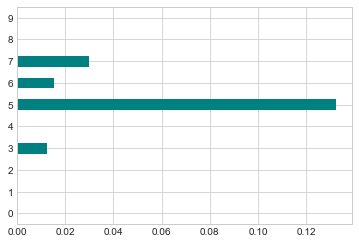

In [171]:
importance=mutual_info_classif(X,Y)
feat_importance=pd.Series(importance)
feat_importance.plot(kind='barh',color='teal')
plt.show()

As we can see the entropy through mutual information gain , the columns which affect taking personal loan are 
1. income
2. fixed_deposit
3. mortgage
4. education
5. age

In [172]:
feat_importance.index=X.columns
feat_importance.sort_values(ascending=False)

income           0.132240
fixed_deposit    0.029976
mortgage         0.015342
education        0.012609
age              0.000145
pin_code         0.000000
fam_members      0.000000
t_experience     0.000000
demat            0.000000
net_banking      0.000000
dtype: float64

Greater the value of entropy stronger will be the affect of respective column on personal loan  
#Note: Income has the graeatest value of entropy hence it will give greater affect

In [173]:
#Feature selection of categorial variable using chi-test
X_train,X_test,y_train,y_test=train_test_split(df[['education', 'fixed_deposit', 'demat', 'net_banking', 'pin_code']],
                                              df['loan'],test_size=0.3,random_state=100)

In [174]:
f_p_values=chi2(X_train,y_train)
f_p_values

(array([2.23549301e+01, 3.35738141e+02, 6.74718072e-01, 2.47496292e-01,
        9.80324659e-06]),
 array([2.26630511e-06, 5.40809946e-75, 4.11411493e-01, 6.18843559e-01,
        9.97501817e-01]))

In [175]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=False)

pin_code         9.975018e-01
net_banking      6.188436e-01
fixed_deposit    5.408099e-75
education        2.266305e-06
demat            4.114115e-01
dtype: float64

In [176]:
#Feature selection of categorial variable using mutual information gain
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['loan'], axis=1),df['loan'],test_size=0.3,random_state=0)
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00099585, 0.00109165, 0.00182373, 0.01701572, 0.        ,
       0.12587598, 0.01215844, 0.02038381, 0.00109853, 0.        ])

In [177]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

income           0.125876
fixed_deposit    0.020384
education        0.017016
mortgage         0.012158
fam_members      0.001824
demat            0.001099
age              0.001092
pin_code         0.000996
t_experience     0.000000
net_banking      0.000000
dtype: float64

<AxesSubplot:>

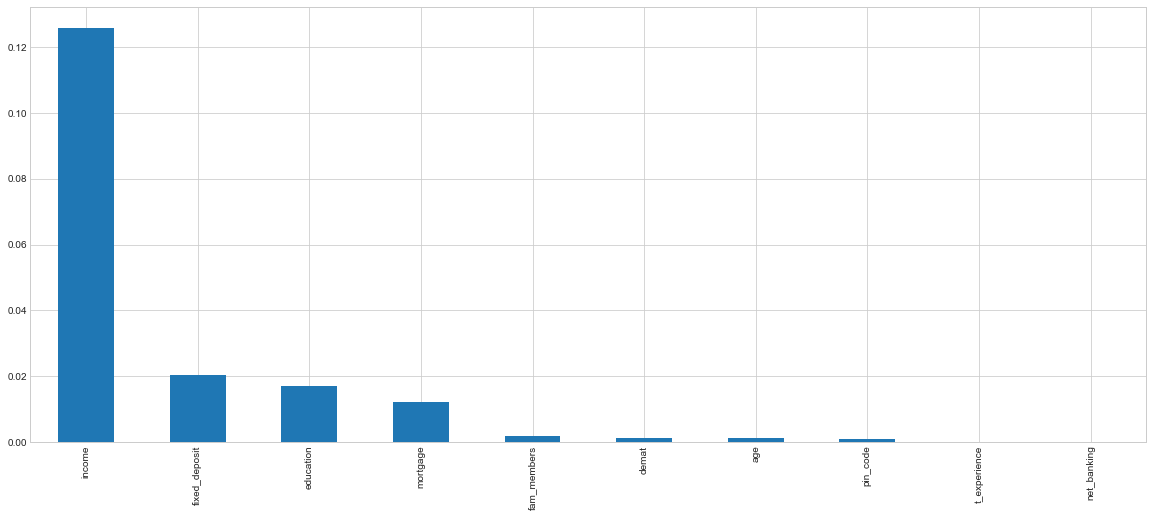

In [178]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [179]:
#Remove Experience due to high colinearity with age
X = df.drop(['loan','t_experience'], axis=1)
Y=df['loan']

In [180]:
#Using OneHotEncoding creating dummies for Pincode
X=pd.get_dummies(X,columns=['pin_code'],drop_first=True)
X

,age,fam_members,education,income,mortgage,fixed_deposit,demat,net_banking,pin_code_110003,pin_code_110004,pin_code_110011,pin_code_110014
0,23,4,1,392,0,0,1,0,0,0,0,0
1,43,3,1,272,0,0,1,0,0,0,0,1
2,37,1,1,88,0,0,0,0,0,0,0,1
3,33,1,2,800,0,0,0,0,1,0,0,0
4,33,4,2,360,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27,1,3,320,0,0,0,1,0,0,0,1
4996,28,4,1,120,680,0,0,1,0,1,0,0
4997,61,2,3,192,0,0,0,0,0,0,0,1
4998,63,3,2,392,0,0,0,1,1,0,0,0


In [181]:
#Splitting dataset
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=0)  

In [182]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

# LOGISTIC REGRESSION

In [183]:
model=LogisticRegression(solver='liblinear',random_state=0,class_weight={0:0.15,1:0.85})
model.fit(X_train,Y_train)
print(model.intercept_)
print(model.coef_)
Y_pred=model.predict(X_test)

[-6.07364566]
[[-2.44430057e-02  2.76099712e-01  8.49316333e-01  5.38639583e-03
  -4.23383184e-05  2.27323548e+00 -4.32605541e-01 -4.13722174e-01
  -1.71047736e-01 -1.75424976e-01 -2.61861099e-01 -4.83253795e-01]]


<AxesSubplot:>

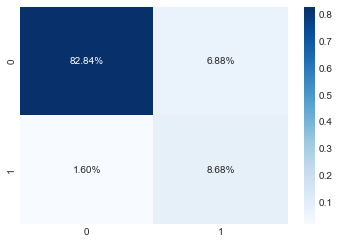

In [184]:
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

In [185]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [186]:
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)

ACCURACY TRAIN :  0.907  ACCURACY TEST :  0.915
RECALL TRAIN :  0.822  RECALL TEST :  0.844
PRECISION TRAIN :  0.502  PRECISION TEST :  0.558
F1 SCORE TRAIN :  0.623  F1 SCORE TEST :  0.672


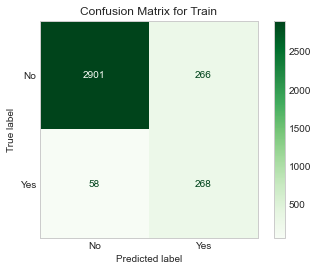

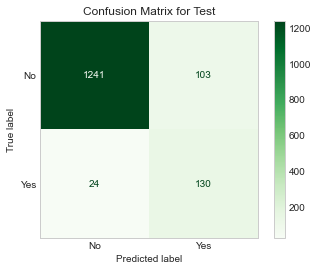

ROC SCORE TRAIN :   0.869 ROC SCORE TEST :   0.884


In [187]:
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING


In [188]:
logModel = LogisticRegression()
param_grid = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], 'max_iter' : [100, 1000,2500, 5000]}]
hreg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = hreg.fit(X,Y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.90382688 ...        nan 0.89260616 0.89240572]
  warnings.warn(


In [189]:
best_clf.best_estimator_

LogisticRegression(C=78.47599703514607, max_iter=2500)

In [190]:
log_hyp=LogisticRegression(C=4.281332398719396, max_iter=2500,class_weight={0:0.15,1:0.85})
log_hyp.fit(X_train,Y_train)
print(log_hyp.intercept_)
print(log_hyp.coef_)
Y_pred=log_hyp.predict(X_test)

[-10.84463623]
[[ 2.13024902e-03  5.53564458e-01  1.34278687e+00  7.11959855e-03
  -5.88491474e-05  3.02382781e+00 -5.61009737e-01 -3.41078099e-01
   2.05966688e-01  1.69405713e-01  1.19758009e-02 -2.77428984e-01]]


<AxesSubplot:>

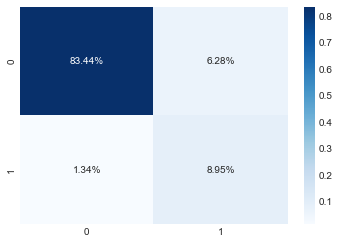

In [191]:
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

ACCURACY TRAIN :  0.916  ACCURACY TEST :  0.924
RECALL TRAIN :  0.834  RECALL TEST :  0.87
PRECISION TRAIN :  0.53  PRECISION TEST :  0.588
F1 SCORE TRAIN :  0.648  F1 SCORE TEST :  0.702


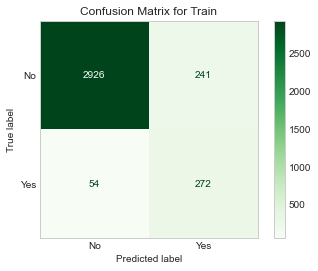

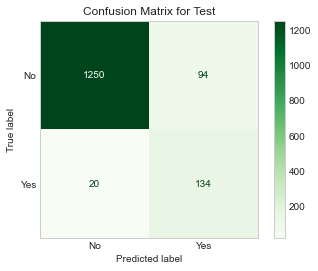

ROC SCORE TRAIN :   0.879 ROC SCORE TEST :   0.9


In [192]:
pred_train = log_hyp.predict(X_train)
pred_test = log_hyp.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# KMEANS CLUSTERING 

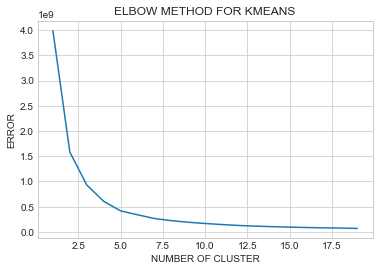

In [193]:
from sklearn.cluster import KMeans
Error=[]
for i in range(1,20) :
    kmeans=KMeans(n_clusters=i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
plt.plot(range(1,20),Error)
plt.title('ELBOW METHOD FOR KMEANS')
plt.xlabel('NUMBER OF CLUSTER')
plt.ylabel('ERROR')
plt.show()

In [194]:
kclf=KNeighborsClassifier (n_neighbors=5)
kclf.fit(X_train,Y_train)
Y_pred=kclf.predict(X_test)

<AxesSubplot:>

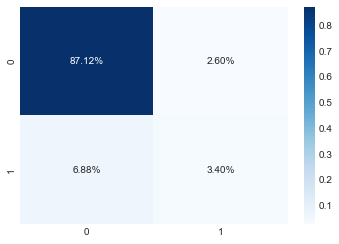

In [195]:
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

ACCURACY TRAIN :  0.93  ACCURACY TEST :  0.905
RECALL TRAIN :  0.457  RECALL TEST :  0.331
PRECISION TRAIN :  0.683  PRECISION TEST :  0.567
F1 SCORE TRAIN :  0.548  F1 SCORE TEST :  0.418


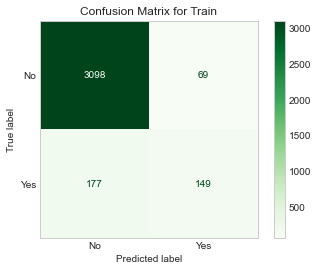

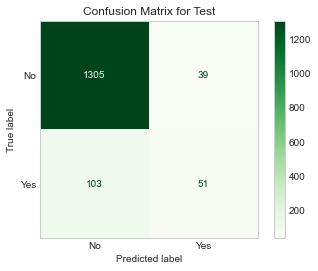

ROC SCORE TRAIN :   0.718 ROC SCORE TEST :   0.651


In [196]:
pred_train = kclf.predict(X_train)
pred_test =kclf.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# GAUSSIAN NAIVE BAYES 

In [197]:
GNB = GaussianNB(var_smoothing=2e-9)
GNB.fit(X_train,Y_train)
Y_pred=GNB.predict(X_test)

<AxesSubplot:>

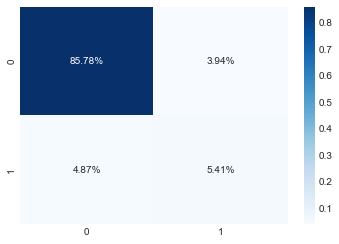

In [198]:
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

ACCURACY TRAIN :  0.9  ACCURACY TEST :  0.912
RECALL TRAIN :  0.466  RECALL TEST :  0.526
PRECISION TRAIN :  0.462  PRECISION TEST :  0.579
F1 SCORE TRAIN :  0.464  F1 SCORE TEST :  0.551


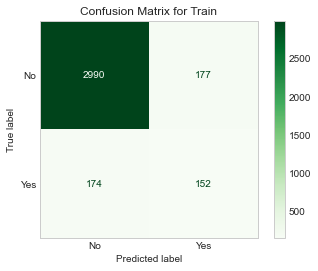

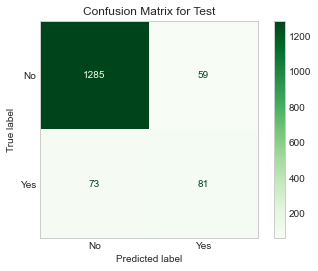

ROC SCORE TRAIN :   0.705 ROC SCORE TEST :   0.741


In [199]:
pred_train = GNB.predict(X_train)
pred_test =GNB.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# GAUSSIAN NAIVE BAYES WITH HYPERTUNING 

In [200]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1e-07)


In [201]:
Y_pred = nbModel_grid.predict(X_test)

<AxesSubplot:>

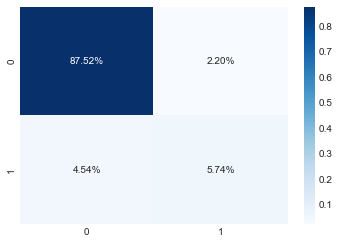

In [202]:
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

ACCURACY TRAIN :  0.924  ACCURACY TEST :  0.933
RECALL TRAIN :  0.497  RECALL TEST :  0.558
PRECISION TRAIN :  0.618  PRECISION TEST :  0.723
F1 SCORE TRAIN :  0.551  F1 SCORE TEST :  0.63


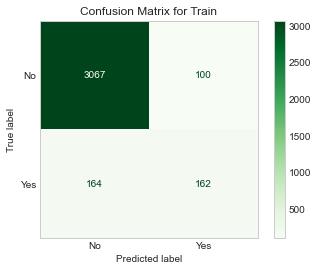

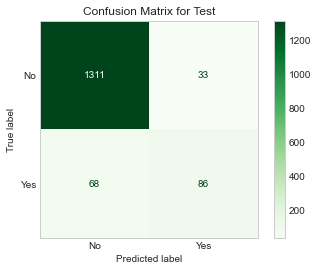

ROC SCORE TRAIN :   0.733 ROC SCORE TEST :   0.767


In [203]:
pred_train = nbModel_grid.predict(X_train)
pred_test =nbModel_grid.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# DECISION TREES

In [204]:
dt_clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,class_weight={0:0.15,1:0.85})
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5)

In [205]:
Y_pred =dt_clf.predict(X_test)

<AxesSubplot:>

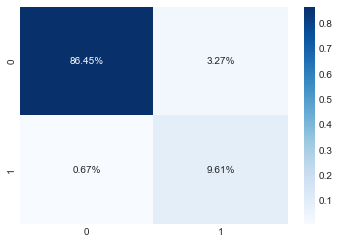

In [206]:
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

ACCURACY TRAIN :  0.957  ACCURACY TEST :  0.961
RECALL TRAIN :  0.963  RECALL TEST :  0.935
PRECISION TRAIN :  0.693  PRECISION TEST :  0.746
F1 SCORE TRAIN :  0.806  F1 SCORE TEST :  0.83


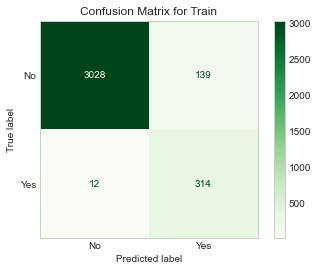

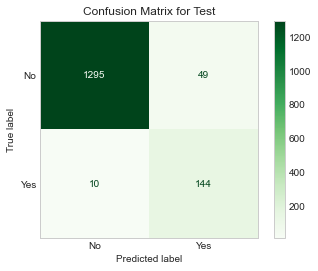

ROC SCORE TRAIN :   0.96 ROC SCORE TEST :   0.949


In [207]:
pred_train =dt_clf.predict(X_train)
pred_test =dt_clf.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# DECISION TREE WITH PRE PRUNING OR HYPERTUNING

In [208]:
from sklearn import metrics
dt_cf=tree.DecisionTreeClassifier()

In [209]:
params_dict={"max_depth":range(1,10)}
grid=GridSearchCV(dt_cf,param_grid=params_dict,cv=5,verbose=1)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10)}, verbose=1)

In [210]:
grid.best_params_

{'max_depth': 4}

In [211]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [212]:
grid.best_score_

0.9779570487515936

In [213]:
dt_cf=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy',class_weight={0:0.15,1:0.85})
dt_cf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=4)

In [214]:
Y_pred =dt_cf.predict(X_test)

<AxesSubplot:>

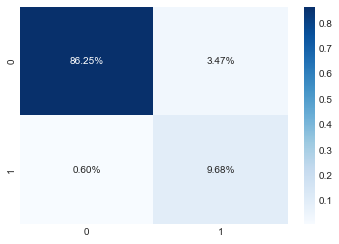

In [215]:
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

ACCURACY TRAIN :  0.953  ACCURACY TEST :  0.959
RECALL TRAIN :  0.948  RECALL TEST :  0.942
PRECISION TRAIN :  0.678  PRECISION TEST :  0.736
F1 SCORE TRAIN :  0.79  F1 SCORE TEST :  0.826


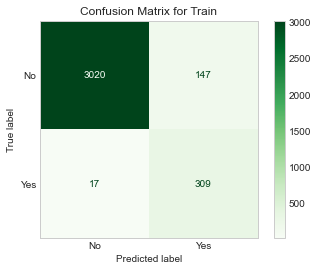

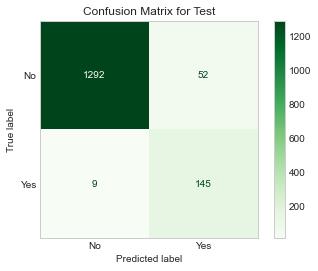

ROC SCORE TRAIN :   0.951 ROC SCORE TEST :   0.951


In [216]:
pred_train =dt_cf.predict(X_train)
pred_test =dt_cf.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# DECISION TREE WITH COST PRUNING 

In [217]:
clf = tree.DecisionTreeClassifier()

In [218]:
path=clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00017893 0.00017893 0.00018631 0.00018987 0.00019039
 0.00021717 0.00023857 0.00024324 0.00024539 0.0002505  0.00025084
 0.00026243 0.0002672  0.00031201 0.00031404 0.00033944 0.00038172
 0.00038997 0.00043625 0.0004676  0.00047714 0.00049078 0.00057613
 0.00061327 0.0006276  0.00069475 0.00083236 0.00095611 0.00103609
 0.00111589 0.0011257  0.00125359 0.00384291 0.01838428 0.02361368
 0.04481158]
Impurities in Decision Tree : [0.         0.00053679 0.00107358 0.00219146 0.00276106 0.00333222
 0.00506958 0.00554672 0.00724938 0.00774016 0.00824116 0.00874284
 0.0092677  0.00980211 0.01105015 0.01324841 0.01494561 0.01532732
 0.01649725 0.01693349 0.0174011  0.01787824 0.01984135 0.02041748
 0.02164402 0.02289922 0.02359397 0.02525869 0.02812703 0.02916311
 0.0313949  0.0325206  0.03377419 0.03761711 0.05600138 0.07961507
 0.16923824]


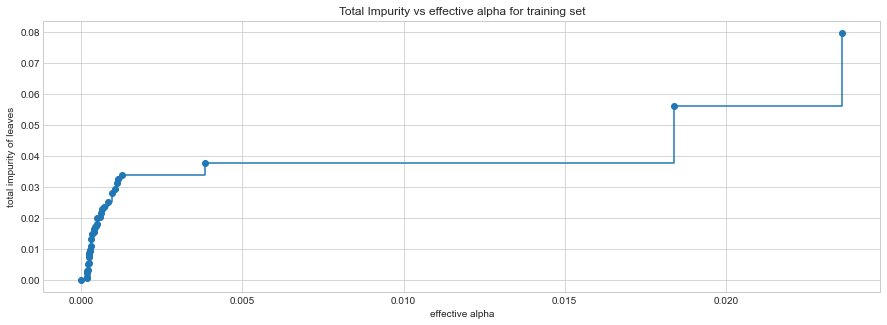

In [219]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [220]:
clfs=[]   
for ccp_alpha in ccp_alphas:
    clf=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha,class_weight={0:0.15,1:0.85})
    clf.fit(X_train,Y_train)
    clfs.append(clf)

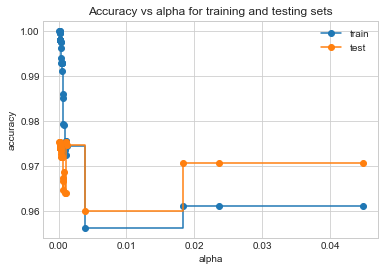

In [221]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [222]:
clfs = []
accuracy_train=[]
accuracy_test=[]
recall_train=[]
recall_test=[]
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, Y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    accuracy_train.append(clf.score(X_train,Y_train))
    accuracy_test.append(clf.score(X_test,Y_test))
    recall_train.append(metrics.recall_score(Y_train,Y_train))
    recall_test.append(metrics.recall_score(Y_test,Y_test))
    clfs.append(clf)

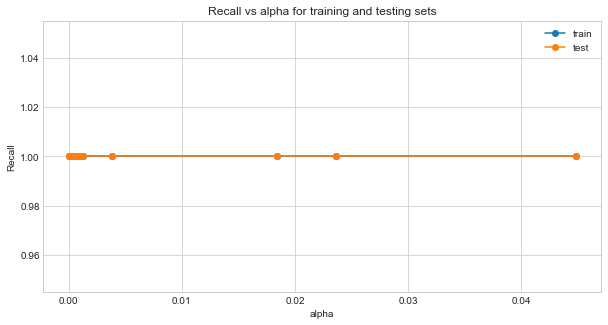

In [223]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [224]:
best_model = tree.DecisionTreeClassifier(ccp_alpha=0.002,class_weight={0: 0.15, 1: 0.85}, random_state=0)
best_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=0)

ACCURACY TRAIN :  0.961  ACCURACY TEST :  0.964
RECALL TRAIN :  0.954  RECALL TEST :  0.922
PRECISION TRAIN :  0.72  PRECISION TEST :  0.772
F1 SCORE TRAIN :  0.821  F1 SCORE TEST :  0.84


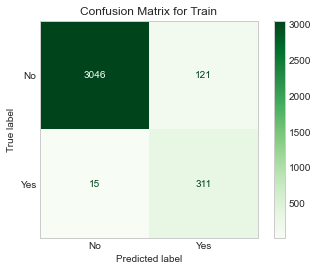

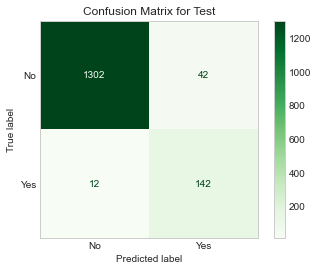

ROC SCORE TRAIN :   0.958 ROC SCORE TEST :   0.945


In [225]:
pred_train =best_model.predict(X_train)
pred_test =best_model.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# RANDOM FOREST

<AxesSubplot:>

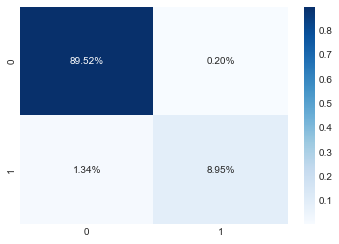

In [226]:
rf_clf=ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,Y_train)
rf_clf.score(X_test,Y_test)
Y_pred =rf_clf.predict(X_test)
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM/np.sum(CM), annot=True ,fmt='.2%', cmap='Blues')

ACCURACY TRAIN :  1.0  ACCURACY TEST :  0.985
RECALL TRAIN :  1.0  RECALL TEST :  0.87
PRECISION TRAIN :  1.0  PRECISION TEST :  0.978
F1 SCORE TRAIN :  1.0  F1 SCORE TEST :  0.921


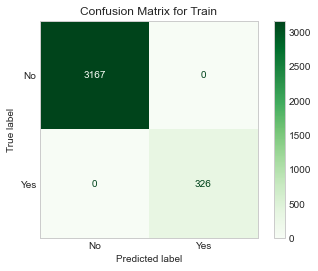

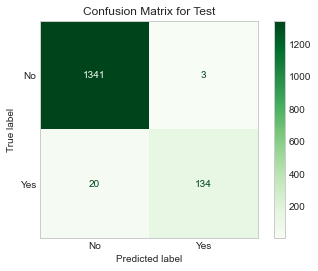

ROC SCORE TRAIN :   1.0 ROC SCORE TEST :   0.934


In [227]:
pred_train =rf_clf.predict(X_train)
pred_test =rf_clf.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# RANDOM FOREST WITH HYPERTUNING

In [228]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = ensemble.RandomForestClassifier(random_state=42)

In [229]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='recall')

In [230]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 3}

In [231]:
rf_cf = grid_search.best_estimator_

In [232]:
rf_cf.fit(X_test, y_test)
rf_cf.score(X_test,Y_test)

0.9973297730307076

ACCURACY TRAIN :  0.973  ACCURACY TEST :  0.997
RECALL TRAIN :  0.847  RECALL TEST :  0.987
PRECISION TRAIN :  0.857  PRECISION TEST :  0.987
F1 SCORE TRAIN :  0.852  F1 SCORE TEST :  0.987


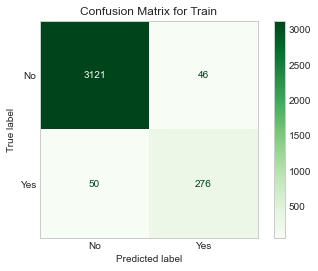

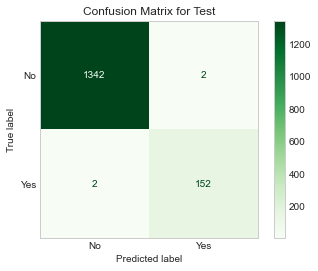

ROC SCORE TRAIN :   0.916 ROC SCORE TEST :   0.993


In [233]:
pred_train =rf_cf.predict(X_train)
pred_test =rf_cf.predict(X_test)
train_acc = accuracy_score(Y_train,pred_train)
test_acc = accuracy_score(Y_test,pred_test)
train_recall = recall_score(Y_train,pred_train)
test_recall = recall_score(Y_test,pred_test)
train_precision = precision_score(Y_train,pred_train)
test_precision = precision_score(Y_test,pred_test)
train_f1 = f1_score(Y_train,pred_train)
test_f1 = f1_score(Y_test,pred_test)
print("ACCURACY TRAIN : ",round(accuracy_score(Y_train,pred_train),3)," ACCURACY TEST : ", round(accuracy_score(Y_test,pred_test),3))
print("RECALL TRAIN : ",round(recall_score(Y_train,pred_train),3)," RECALL TEST : ", round(recall_score(Y_test,pred_test),3))
print("PRECISION TRAIN : ",round(precision_score(Y_train,pred_train),3), " PRECISION TEST : ",round(precision_score(Y_test,pred_test),3))
print( "F1 SCORE TRAIN : ",round(f1_score(Y_train,pred_train),3)," F1 SCORE TEST : ",round(f1_score(Y_test,pred_test),3))
make_confusion_matrix(Y_train,pred_train,"Confusion Matrix for Train")     
make_confusion_matrix(Y_test,pred_test,"Confusion Matrix for Test")
print("ROC SCORE TRAIN :  ",round(roc_auc_score(Y_train,pred_train),3),"ROC SCORE TEST :  ",round(roc_auc_score(Y_test,pred_test),3))

# ROC AUC GRAPH PLOTTING

In [234]:
def plot_roc(xtest,ytest,models):
    #models object should be a dictionary comprising of name of model and the model object
    fig, ax = plt.subplots(figsize=(20,10))
    for name,model in models.items():

        if hasattr(model,'decision_function'):
            probs=model.decision_function(xtest) 
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(xtest) [:,1]
        fpr,tpr,threshold=roc_curve(ytest,probs)
        roc_auc=auc(fpr,tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))
        
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.96
ROC AUC=0.96
ROC AUC=0.85
ROC AUC=0.94
ROC AUC=0.95
ROC AUC=0.97
ROC AUC=0.98
ROC AUC=0.98
ROC AUC=0.97
ROC AUC=1.00


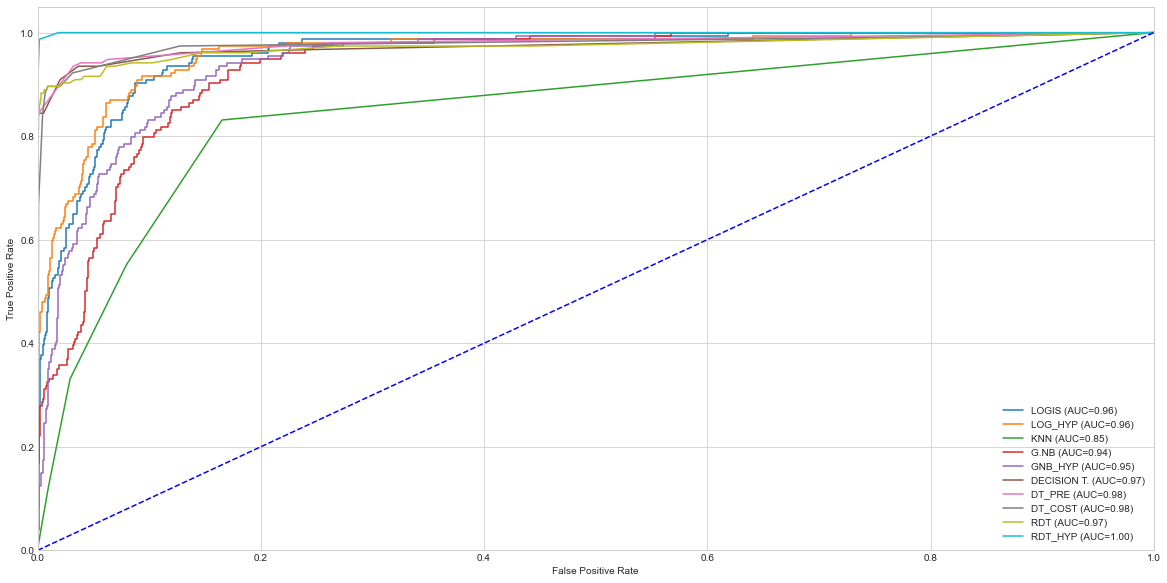

In [235]:
models={'LOGIS':model,'LOG_HYP':log_hyp,'KNN':kclf,'G.NB':GNB,'GNB_HYP':nbModel_grid,'DECISION T.':dt_clf,'DT_PRE':dt_cf,'DT_COST':best_model,'RDT':rf_clf,'RDT_HYP':rf_cf}
plot_roc(X_test,Y_test,models)

# CONCLUSION

Through the ROC_AUC CURVE used for comparing all models we conclude that DECISISON TREE WITH PRE PRUNING is our best model with AUC score of 98% and ACCURACY TRAIN :  0.953  ACCURACY TEST :  0.959
RECALL TRAIN :  0.948  RECALL TEST :  0.942